#Reporte Oceanográfico 

##Clorofila 

Hacer graficos con promedio semanal y de 3 dìas de las condiciones oceanograficas con respecto a la Clorofila previo al inicio de temporada 2018 - 2022

*   Panorama completo - Zona Centro Norte
*   Clorofila frente a los principales puertos CY, CE, TM
*   Clorofila a las 7mn y 10mn de costa entre los 0ºN a 16ºS





Requisitos previos

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install basemap-data
!apt install proj-bin libproj-dev libgeos-dev
!pip install Basemap

!pip install pyproj==1.9.6
from mpl_toolkits import basemap
print(basemap.__version__)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
1.3.2


In [ ]:
!pip install motuclient

  Created wheel for motuclient: filename=motuclient-3.0.0-py3-none-any.whl size=33305 sha256=608f1b5def48ad3ba7220a62fe6c1fa53b5ee251b1af7f546bee0d94f3e2e655
  Stored in directory: /root/.cache/pip/wheels/11/c9/ce/8f4753986c08cf5d447f25dcfef15e36c73baa6aaa4962d9ec
Successfully built motuclient


Importamos los paquetes de Python a utilizar

In [ ]:
#importar
import os
from netCDF4 import Dataset
from datetime import date
import numpy as np
#from oceans.colormaps import cm
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap


Cargamos los datos

In [ ]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/centinela/'Reporte Oceanografico '/Clorofila/

/content/drive/MyDrive/centinela/Reporte Oceanografico /Clorofila


In [ ]:
ls

CHL_OCEANCOLOUR_GLO_CHL_2022-01.nc  CHL_OCEANCOLOUR_GLO_CHL_2022-03.nc
CHL_OCEANCOLOUR_GLO_CHL_2022-02.nc  CHL_OCEANCOLOUR_GLO_CHL_2022-04.nc


In [ ]:
data=Dataset('CHL_OCEANCOLOUR_GLO_CHL_2022-03.nc')
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    comment: average
    distribution_statement: See CMEMS Data License
    site_name: GLO
    parameter_code: CHL
    creation_time: 12:25:50 UTC
    creation_date: 2022-04-14 UTC
    nb_grid_bins: 2099520000
    easternmost_longitude: 180.0
    references: http://www.globcolour.info GlobColour has been originally funded by ESA with data from ESA, NASA, NOAA and GeoEye. This version has received funding from the European Community s Seventh Framework Programme ([FP7/2007-2013]) under grant agreement n. 282723 [OSS2015 project].
    registration: 5
    stop_date: 2022-04-13 UTC
    lon_step: 0.0055555557
    cmems_product_id: OCEANCOLOUR_GLO_CHL_L3_NRT_OBSERVATIONS_009_032
    naming_authority: CMEMS
    northernmost_valid_latitude: 70.005554
    grid_mapping: Equirectangular
    title: dataset-oc-glo-bio-multi-l3-chl_300m_daily-rt
    period_end_day: 20220413
    duration_time: PT97390S
  

In [ ]:
#variables de long, latitud, tiempo
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
time = data.variables['time'][:]

In [ ]:
#encontrando el dia 1 o dia de creacion
creation_day = data.variables['time'].units[11:21]
#print('El dia de creacion fue ',creation_day)
yy=int(creation_day[:4]); mm=int(creation_day[5:7]); dd=int(creation_day[8:10])  
print('año de creacion:',yy); print('mes de creacion:',mm); print('dia de creacion:',dd)

año de creacion: 1900
mes de creacion: 1
dia de creacion: 1


In [ ]:
#fecha=date.fromordinal(int(time+np.array(date.toordinal(date(yy,mm,dd)))))
fecha=time+np.array(date.toordinal(date(yy,mm,dd)))
fecha

masked_array(data=[738215., 738216., 738217., 738218., 738219., 738220.,
                   738221., 738222., 738223., 738224., 738225., 738226.,
                   738227., 738228., 738229., 738230., 738231., 738232.,
                   738233., 738234., 738235., 738236., 738237., 738238.,
                   738239., 738240., 738241., 738242., 738243., 738244.,
                   738245.],
             mask=False,
       fill_value=1e+20)

In [ ]:
clorofila = data.variables['CHL'][:][0,:,:]
clorofila

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-999.0,
  dtype=float32)

In [ ]:
area_centro=[-84,-74, -16, -3]
mp = Basemap(projection ='merc',
             llcrnrlon=float(area_centro[0]),
             llcrnrlat=float(area_centro[2]),
             urcrnrlon=float(area_centro[1]),
             urcrnrlat=float(area_centro[3]),
             resolution='i')

loni,lati = np.meshgrid(lon,lat)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


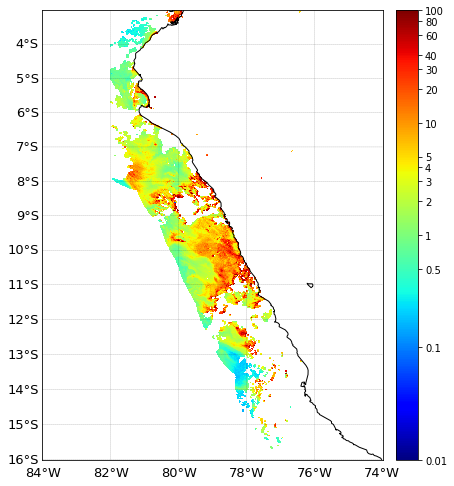

In [ ]:
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(100),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60,80,100]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60,80,100])

mp.drawcoastlines()
mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2',fontsize=13)
mp.drawmeridians(np.arange(-88,-65,2),labels=[0,0,0,1],linewidth='0.2',fontsize=13)
plt.show()

##Puertos del Peru

In [ ]:
Puertos = {
    # "Inglés": [-17.65611111,  -71.35083333],
    # "Ilo": [-17.64138889, -71.34777778],
    # "Pacocha":[-17.28,    -71.34333333],
    # "Mollendo":   [-17.03722222,  -72.00416667],
    # #"Matarani":  [-16.99583333,  -72.105],
    # "Quilca": [-16.71166667,  -72.43333333],
    # "La Planchada":   [-16.40472222,  -73.21277778],
    # "Camana":     [-16.64722222,  -72.70055556],
    # "Ilo":    [-17.63388889,  -71.33944444],
    # "M. Sama":    [-17.97166667,  -70.89027778],
    # "L. Palos":   [-18.27638889,  -70.47555556],
    # "Atico":  [-16.22388889,  -73.69916667],
    # "Chala":  [-15.81555556,  -74.42166667],
    # "Punta Infiernillos": [-14.52,    -75.9],
    # "Punta Caballa":  [-14.94972222,  -75.49833333],
    "San Juan":   [-15.36638889, -75.17055556],
    #"Lomas": [-15.55777778,  -74.85],
    "San Juan":   [-15.34888889,  -75.16027778],
    "San Nicolás":    [-15.25,    -75.24166667],
    "Bahia Independencia": [-14.2522222222222, -76.1347222222222],
    #"General San Martín": [-13.8, -76.28916667],
    "Pisco":  [-13.69388889,  -76.22416667],
    "Tambo de Mora":[-13.455, -76.18972222],
    "Cerro Azul":   [-13.02055556,  -76.48555556],
    #"Bujama":  [-12.7225,  -77.62944444],
    "Pucusana":[-12.4977777777778,  -76.7952777777778],
    "Chorrillos":[-12.15638889, -77.03194444],
    "Callao":   [-12.0575,  -77.15305556],
    "Ancón":    [-11.76416667,  -77.17694444],
    "Chancay":  [-11.575,   -77.27361111],
    "Huacho":   [-11.11055556,  -77.62027778],
    #"Carquín": [-11.08166667,  -77.63333333],
    "Vegeta":   [-11,   -77.675],
    "Supe": [-11.4758333333333, -77.50],
    "Barranca":[-10.76222222,   -77.76583333],
    "Punta Bermejo":[-10.4730555555556, -77.9661111111111],
    "Las Zorras":[-10.2686111111111, -78.0788888888889],
    "Huarmey":[-10.08916667,    -78.17166667],
    "Culebras"  :[-9.945,   -78.23333333],
    #"Tortugas":    [-9.337777778,  -77.405],
    "Samanco":  [-9.237777778,  -78.50277778],
    "Chimbote": [-9.076666667,  -78.61472222],
    #"Santa":   [-8.977777778,  -78.65333333],
    "Punta Chao":[-8.74138888888889,-78.7497222222222],
    #"Coscobamba":   [-8.656944444,  -78.76111111],
    "Casma" :[-9.43694444444444,    -78.385],
    "Guañape":  [-8.416666667,  -78.89388889],
    "Salaverry":    [-8.224444444,  -78.98166667],
    "Huanchaco":    [-8.073333333,  -79.12333333],
    "Chicama"   :[-7.703611111, -79.45916667],
    "Pacasmayo":[-7.386944444,  -79.58833333],
    "Chérrepe": [-7.153333333,  -79.70166667],
    #"Lagunas":[-7.088333333,   -79.73055556],
    "Eten": [-6.943333333,  -79.87972222],
    #"Santa Rosa":  [-6.896666667,  -79.94166667],
    "Pimentel": [-6.847777778,  -79.95583333],
    #"San José":    [-6.798333333,  -79.99166667],
    "Morrope":[-6.55027777777778,-80.2438888888889],
    "Punta La Negra":[-5.98,-81.1491666666667],
    "Mancora":  [-5.79, -81.06083333],
    #"Parachique":[-5.67,-80.838333],
    "Sechura":[-5.55694,-80.82222],
    "Punta Gobernador":[-5.3144,-81.1050],
    "Paita":    [-5.078055556,  -81.10638889],
    "Negritos": [-4.644166667,  -81.32222222],
    #"Talara":  [-4.570277778,  -81.27972222],
    "Lobitos":  [-4.4375,   -81.28416667],
    "Cabo Blanco":  [-4.242777778,  -81.22888889],
    "Los Órganos":  [-4.171944444,  -81.13333333],
    "Cancas":   [-3.943611111,  -80.94388889],
    "Zorritos": [-3.685277778,  -80.67138889],
    "Puerto Pizarro":   [-3.513055556,  -80.40333333]
    }

##Ploteo 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


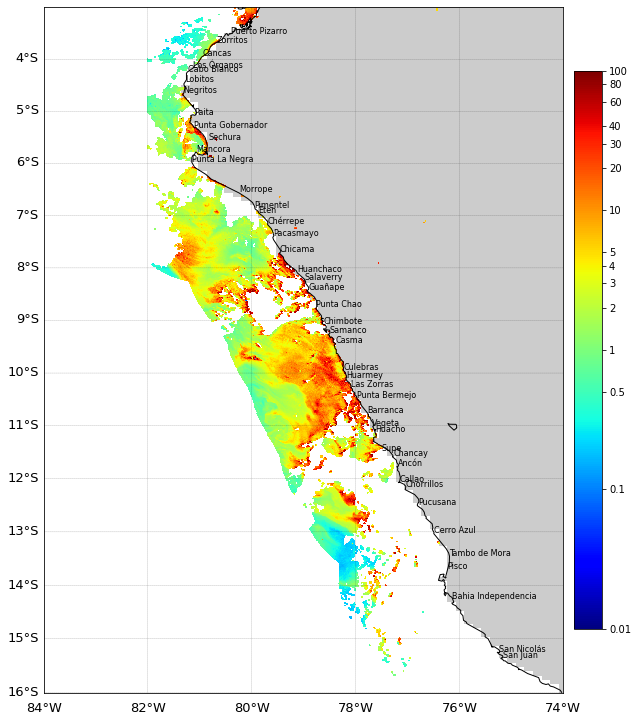

In [ ]:
fig=plt.figure(figsize=(10,15))

for key in Puertos:
  x2,y2 = mp(Puertos[key][1],Puertos[key][0])
  plt.text(x2,y2,key,fontsize=8)

x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(clorofila), vmin=np.log10(0.01), vmax=np.log10(100),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.05)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60,80,100]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60,80,100])

mp.drawcoastlines()
mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2',fontsize=13)
mp.drawmeridians(np.arange(-88,-65,2),labels=[0,0,0,1],linewidth='0.2',fontsize=13)
mp.drawlsmask()


# Datos Diarios de Clorofila

### Ploteamos los datos de Clorofila de manera diaria para observar los cambios de distribucion de clorofila debido a corrientes, viento, etc

In [ ]:
import time
import datetime

for kk in range(0,len(fecha)):
  dia=datetime.date.fromordinal(int(fecha[kk]))
  fig=plt.figure(figsize=(11.69,8.27))
  plt.clf()
  x,y = mp(loni,lati)
  cs = mp.pcolormesh(x, y, np.log10(data.variables['CHL'][:][kk,:,:]), vmin=np.log10(0.01), vmax=np.log10(100),  cmap='jet', shading='flat')
  cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
  for key in Puertos:
    x2,y2 = mp(Puertos[key][1],Puertos[key][0])
    plt.text(x2,y2,key,fontsize=8)

  cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60,80,100]))
  cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60,80,100])

  mp.drawcoastlines()
  mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2',fontsize=13)
  mp.drawmeridians(np.arange(-88,-65,2),labels=[0,0,0,1],linewidth='0.2',fontsize=13)
  mp.drawlsmask()

  plt.text(0.6, 0.78, str(dia.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)
  # plt.pause(0.5)
  

  plt.show()

NameError: ignored

## Promedio de 3 días

In [ ]:
import time
import datetime

dt_inicio=datetime.date.fromordinal(int(fecha[0]))
dt_fin=datetime.date.fromordinal(int(fecha[-1]))

print('fecha de inicio: ', dt_inicio)
print('fecha ultima: ', dt_fin)

In [ ]:
ultimo_dia=int(dt_fin.day)-1
type(ultimo_dia)

In [ ]:
# fecha=time+np.array(date.toordinal(date(yy,mm,dd)))
tiempo=fecha[0]
aa=datetime.datetime.fromtimestamp(tiempo)
print(aa.day)


9


In [ ]:
##Vamos a seleccionar cada 3 días y le ponemos excepciones
indx3=np.where()

In [ ]:
# sem1=np.nanmean(data.variables['CHL'][:][0:6,:,:],axis=0)
# sem4=np.nanmean(data.variables['CHL'][:][21:ultimo_dia,:,:],axis=0)
# ini=0; fin=3;
# print(ultimo_dia)
dast=np.arange(0,ultimo_dia+1,3)
print(dast)
jj=-1; kk=0;
for ij in range(len(dast)-1):
  jj=jj+1
  kk=kk+1

  # prom_3_dias=np.nanmean(data.variables['CHL'][:][dast[jj]:dast[kk],:,:],axis=0)
  fecha_3_dias=datetime.date.fromordinal(int(fecha[dast[kk]])-1)
  print({'jj-kk':[dast[jj], dast[kk]]})
  print(fecha_3_dias)
#   ##grafico
#   fig=plt.figure(figsize=(10,15))
#   x,y = mp(loni,lati)

#   cs = mp.pcolormesh(x, y, np.log10(prom_3_dias), vmin=np.log10(0.01), vmax=np.log10(100),  cmap='jet', shading='flat')
#   cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.05)

#   for key in Puertos:
#     x2,y2 = mp(Puertos[key][1],Puertos[key][0])
#     plt.text(x2,y2,key,fontsize=8)

#   cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60, 80, 100]))
#   cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60, 80, 100])

#   mp.drawcoastlines()
#   mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2',fontsize=13)
#   mp.drawmeridians(np.arange(-88,-65,2),labels=[0,0,0,1],linewidth='0.2',fontsize=13)
#   mp.drawlsmask()

#   plt.text(0.6, 0.78, str(fecha_3_dias.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)
#   plt.text(0.15, 0.2, 'Glob Ocean Colour 300m resolution',transform=plt.gcf().transFigure)
#   plt.text(0.15, 0.21,'Promedio 3 días',transform=plt.gcf().transFigure)

[ 0  3  6  9 12]
{'jj-kk': [0, 3]}
2022-04-03
{'jj-kk': [3, 6]}
2022-04-06
{'jj-kk': [6, 9]}
2022-04-09
{'jj-kk': [9, 12]}
2022-04-12


In [ ]:
print(fecha)

[738246. 738247. 738248. 738249. 738250. 738251. 738252. 738253. 738254.
 738255. 738256. 738257. 738258.]


##### Aqui se debe hacer el codigo de cada 3 días similar a este
##### indx3=find(dia<=3)
##### indx6=find(dia>3 & dia<=6)
##### indx9
##### indx12
##### indx15
##### indx18
##### indx21
##### indx24
##### if mo==2:
#####    indx27 = find(dia>24 & dia<=28)
##### else:
#####    indx27 = find(dia>24 & dia<=27)
##### if ultimo_dia < dia
#####    break
##### else:
##### indx30 = find(dia>27 & dia<=31) -->



# Calculo de las semanas

In [ ]:
import time
import datetime

dt_inicio=datetime.date.fromordinal(int(fecha[0]))
dt_fin=datetime.date.fromordinal(int(fecha[-1]))

print('fecha de inicio: ', dt_inicio)
print('fecha ultima: ', dt_fin)

#se considera una semana como 7 días las 3 primeras semanas y la 4ta hasta donde alcance

fecha de inicio:  2022-03-01
fecha ultima:  2022-03-31


In [ ]:
ultimo_dia=int(dt_fin.day)-1
type(ultimo_dia)

int

El cálculo del promedio semanal de clorofila se hizo de acuerdo a los 7 dias de la semana, por ejemplo en la primera linea de codigo : 'sem1=np.nanmean(data.variables['CHL'][:][0:6,:,:],axis=0)' , nos indica que se tomaran todos los valores de CHL durante el dato 0 al 6, esto representa los 7 días de la semana, ya que Python empieza a contar desde el 0 a diferencia de otros lenguajes como MATLAB que cuentan desde el 1

In [ ]:
sem1=np.nanmean(data.variables['CHL'][:][0:6,:,:],axis=0)
sem2=np.nanmean(data.variables['CHL'][:][7:13,:,:],axis=0)
sem3=np.nanmean(data.variables['CHL'][:][14:20,:,:],axis=0)
sem4=np.nanmean(data.variables['CHL'][:][21:ultimo_dia,:,:],axis=0)


El tiempo durante las semanas, se tomará el último dia de la semana para representar la semana, es decir si la fecha en el grafico es 7 de mayo 2021, representa un promedio de la semana desde el 1 al 7 de mayo.

In [ ]:
fecha_sem1=datetime.date.fromordinal(int(fecha[6]))
fecha_sem2=datetime.date.fromordinal(int(fecha[13]))
fecha_sem3=datetime.date.fromordinal(int(fecha[20]))
fecha_sem4=datetime.date.fromordinal(int(fecha[ultimo_dia]))

print(fecha_sem1.strftime("%A %d %B %Y"))
print(fecha_sem2.strftime("%A %d %B %Y"))
print(fecha_sem3.strftime("%A %d %B %Y"))
print(fecha_sem4.strftime("%A %d %B %Y"))

Monday 07 March 2022
Monday 14 March 2022
Monday 21 March 2022
Thursday 31 March 2022


{-82.0: ([<matplotlib.lines.Line2D at 0x7ff2db3f3d50>],
  [Text(223501.6973122092, -19406.102350875204, '82°W')]),
 -77.0: ([<matplotlib.lines.Line2D at 0x7ff2db3f3d10>],
  [Text(779476.0687356151, -19406.102350875204, '77°W')])}

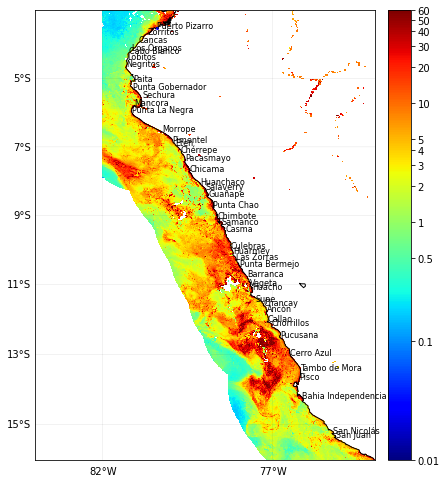

In [ ]:
fig=plt.figure(figsize=(11.69,8.27))
x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cc = plt.plot(x2, y2, 'o', color='blue',markersize=2);
for key in Puertos:
  x2,y2 = mp(Puertos[key][1],Puertos[key][0])
  plt.text(x2,y2,key,fontsize=8)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawcoastlines()
mp.drawparallels(np.arange(int(min(lat)),int(max(lat)),2),labels=[1,0,0,0],linewidth='0.1')
mp.drawmeridians(np.arange(np.round(min(lon)),np.round(max(lon)),5),labels=[0,0,0,1],linewidth='0.1')

In [ ]:
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator

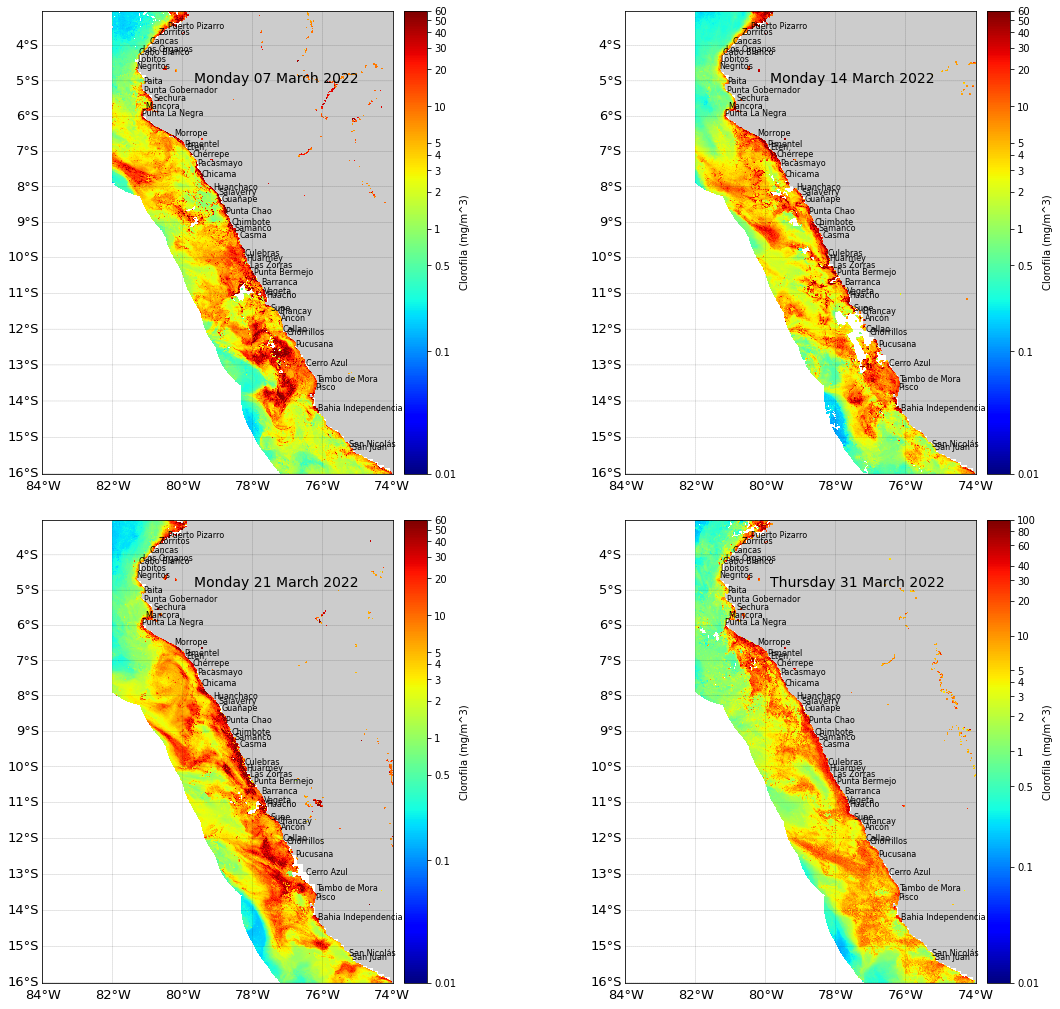

In [ ]:
rcParams['figure.subplot.left'] = 0.1   # move left edge of subplot over a bit
rcParams['figure.subplot.right'] = 0.9
rcParams['figure.subplot.top'] = 0.8
rcParams['figure.subplot.hspace'] = 0.1 # more height between subplots
rcParams['figure.subplot.wspace'] = 0.025 # more width between subplots

# panel 1
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221)
x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(sem1), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cb.set_label('Clorofila (mg/m^3)')

for key in Puertos:
  x2,y2 = mp(Puertos[key][1],Puertos[key][0])
  plt.text(x2,y2,key,fontsize=8)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2',fontsize=13)
mp.drawmeridians(np.arange(-88,-65,2),labels=[0,0,0,1],linewidth='0.2',fontsize=13)
mp.drawlsmask()

plt.text(0.31, 0.75, str(fecha_sem1.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)


# panel 2
ax = fig.add_subplot(222)
x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(sem2), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)

for key in Puertos:
  x2,y2 = mp(Puertos[key][1],Puertos[key][0])
  plt.text(x2,y2,key,fontsize=8)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])
cb.set_label('Clorofila (mg/m^3)')
mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2',fontsize=13)
mp.drawmeridians(np.arange(-88,-65,2),labels=[0,0,0,1],linewidth='0.2',fontsize=13)
mp.drawlsmask()

plt.text(0.71, 0.75, str(fecha_sem2.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)

#panel 3
ax = fig.add_subplot(223)

x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(sem3), vmin=np.log10(0.01), vmax=np.log10(60),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cb.set_label('Clorofila (mg/m^3)')

for key in Puertos:
  x2,y2 = mp(Puertos[key][1],Puertos[key][0])
  plt.text(x2,y2,key,fontsize=8)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60])

mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2',fontsize=13)
mp.drawmeridians(np.arange(-88,-65,2),labels=[0,0,0,1],linewidth='0.2',fontsize=13)
mp.drawlsmask()

plt.text(0.31, 0.4, str(fecha_sem3.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)

#panel 4
ax = fig.add_subplot(224)

x,y = mp(loni,lati)

cs = mp.pcolormesh(x, y, np.log10(sem4), vmin=np.log10(0.01), vmax=np.log10(100),  cmap='jet', shading='flat')
cb = plt.colorbar(cs, pad=0.02, orientation='vertical', fraction=0.1)
cb.set_label('Clorofila (mg/m^3)')

for key in Puertos:
  x2,y2 = mp(Puertos[key][1],Puertos[key][0])
  plt.text(x2,y2,key,fontsize=8)

cb.set_ticks(np.log10([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60,80,100]))
cb.set_ticklabels([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 30, 40, 60,80,100])

mp.drawparallels(np.arange(-20,5,1),labels=[1,0,0,0],linewidth='0.2',fontsize=13)
mp.drawmeridians(np.arange(-88,-65,2),labels=[0,0,0,1],linewidth='0.2',fontsize=13)
mp.drawlsmask()

#   plt.text(0.6, 0.78, str(fecha_3_dias.strftime("%A %d %B %Y")), fontsize=13, transform=plt.gcf().transFigure)
#   plt.text(0.15, 0.2, 'Glob Ocean Colour 300m resolution',transform=plt.gcf().transFigure)
#   plt.text(0.15, 0.21,'Promedio 3 días',transform=plt.gcf().transFigure)

plt.text(0.71, 0.4, str(fecha_sem4.strftime("%A %d %B %Y")), fontsize=14, transform=plt.gcf().transFigure)

#Finalmente se debe guardar la figura como png
# plt.savefig('/content/Clorofila'+'-'+str(fecha_sem2.strftime("%A %d %B %Y"))+'.png',
#    format='png', dpi=600, transparent=False)

#Hacemos una copia para el drive compartido
plt.savefig('/content/drive/MyDrive/centinela/'+'-'+str(fecha_sem2.strftime("%A %d %B %Y"))+'.png',
   format='png', dpi=600, transparent=False)
